### Analysing and visualising wrangled data 

As we have wrangled and clean the **`WeRateDogs Twitter data`**, analyses can be performed to carry out insights and visualiations about the data set.

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt # visualising
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
archive_master = pd.read_csv('twitter_archive_master.csv')
image_master = pd.read_csv('image_predictions_master.csv')

We are going to perform a final check of assessing/cleaning to make sure the master datasets are sufficienct to perform analyses and visualisations.

In [3]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 10 columns):
tweet_id              2086 non-null int64
retweet_count         2086 non-null int64
favorite_count        2086 non-null int64
timestamp             2086 non-null object
source                2086 non-null object
text                  2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
dog_stage             2086 non-null object
dtypes: int64(5), object(5)
memory usage: 163.0+ KB


In [4]:
image_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [5]:
# Retrieve relevant data types for archive

archive_master['tweet_id'] = archive_master['tweet_id'].astype('object')
archive_master['timestamp'] = archive_master['timestamp'].astype('datetime64[ns]')
archive_master['dog_stage'] = archive_master['dog_stage'].astype('category')

In [6]:
# Retrieve relevant data types for image

image_master['tweet_id'] = image_master['tweet_id'].astype('object')

In [7]:
# Check 

assert archive_master['tweet_id'].dtypes == 'object'
assert image_master['tweet_id'].dtypes == 'object'
assert archive_master['timestamp'].dtypes == 'datetime64[ns]'
assert archive_master['dog_stage'].dtypes == 'category'

***

> Make a pie chart to count the most popular dog stage

In [8]:
archive_master.dog_stage.value_counts(normalize=False)

None       1753
pupper      221
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64

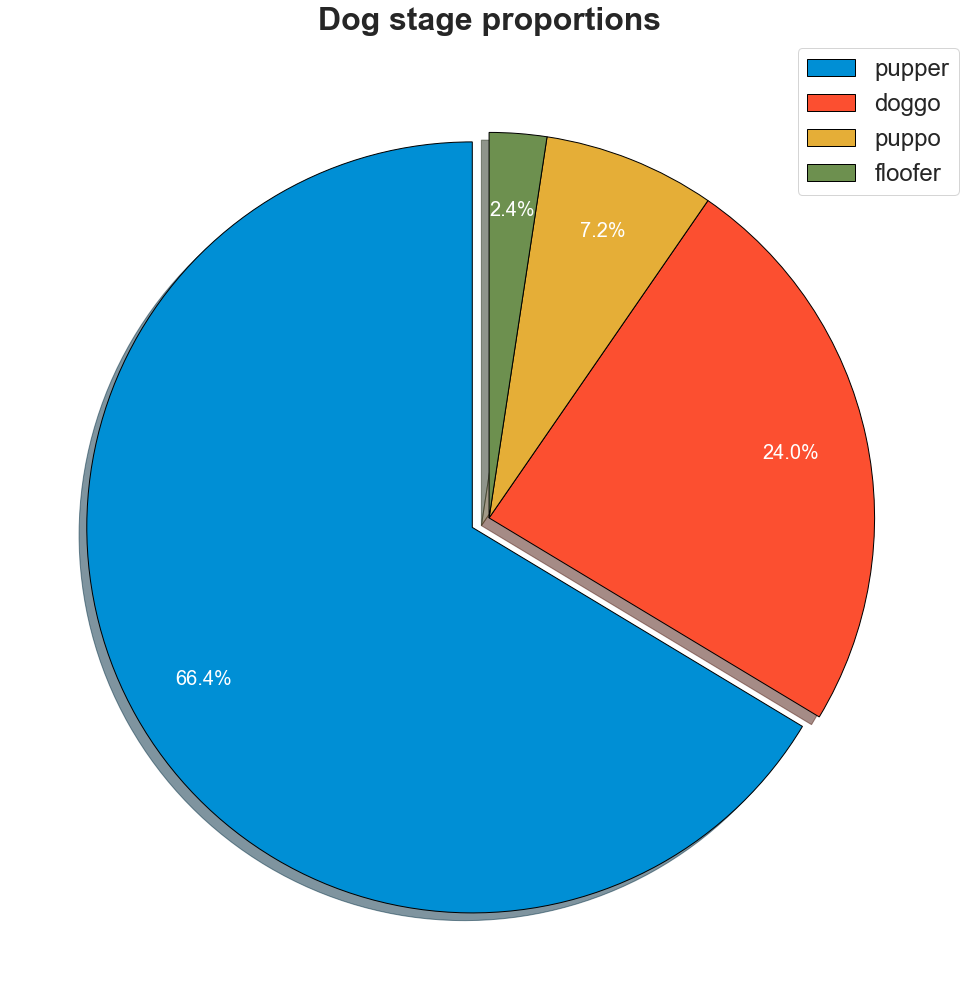

In [10]:
# We are excluding 'None' given the algorithm couldn't parse 
# portions of dog_stages.
# Pie chart, where the slices will be ordered 
# and plotted counter-clockwise:

labels = ('pupper', 'doggo', 'puppo', 'floofer') 
sizes = [221, 80, 24, 8]
explode = (0.05, 0, 0, 0) 
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f']

plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%'
        , shadow=True, startangle=90, pctdistance=0.8,
        textprops=dict(color="w")
        , colors=colors, wedgeprops={'edgecolor': 'black'})

font = {'size': 32,
        'weight': 'heavy'} # control title font and size

plt.title('Dog stage proportions', fontdict=font)
plt.tight_layout() # maintains the spacing
plt.rcParams['figure.figsize'] = 14,16
plt.rcParams.update({'font.size': 20})
plt.legend(fontsize='large')
plt.show();

In [11]:
# Using a slice to select the first dog_stage that is 'None'

None_values = archive_master.dog_stage.value_counts\
(normalize=True)[0]
print("The proportion of 'None' values representing dog stages\
 is {0:.2f}".format(None_values))

The proportion of 'None' values representing dog stages is 0.84


Altogether from the dataset, 84% of dog stage names are missing, which arguablly makes it hard to discern what users preferences are at different dog stages as a sample! 

See here for dog colloquialisms - [DoggoLingo](https://en.wikipedia.org/wiki/DoggoLingo)
* Nevertheless, out of 16% of the dataset values we have left analyse, we find that an overwhelming amount of users **(66.4%)** prefer the dog stage **'pupper' (small/young dog)**.
* This was followed by **24%** of users preferring **'doggo' (regular dog size)**, **7.2%** preferring **'puppo' (puppy)** and **2.4%** preferring **'floofer' (dog with a fluffy coat)**.

*** 

> Ratings (numerator) distribution - histogram

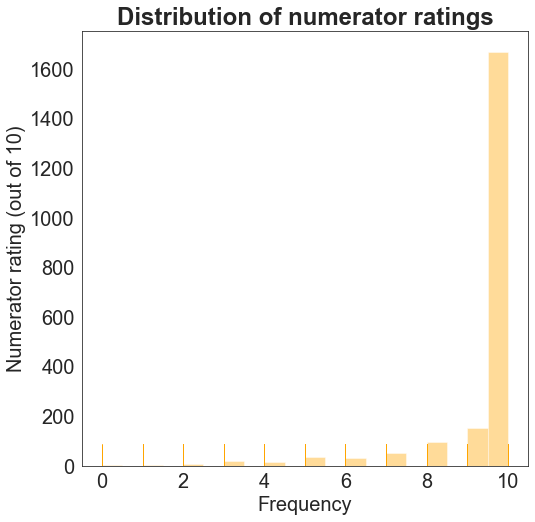

In [13]:
var = archive_master.rating_numerator

font = {'size': 24,
        'weight': 'heavy'} 

sns.distplot(var, bins=20, kde=False, rug=True, vertical=False, 
             color='orange')
plt.title('Distribution of numerator ratings', fontdict=font)
plt.ylabel('Numerator rating (out of 10)', fontsize='medium')
plt.xlabel('Frequency', fontsize='medium')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = 8,8;

In [14]:
# Calculate relative proportions of dog ratings (numerator)

var.value_counts(normalize=True)

10    0.800575
9     0.072387
8     0.045542
7     0.024928
5     0.016779
6     0.015340
3     0.009108
4     0.007670
2     0.004314
1     0.002397
0     0.000959
Name: rating_numerator, dtype: float64

We have the complete data set to evaluate dog ratings by twitter users
* More than **80% of users (at least 1600)** gave the highest rating **(10)** to the dogs tweeted!
* Ratings below 10 did not account for much and were far behind.
* This suggests WeRateDogs is a popular account for users to view/follow.

***

> Most common dog breeds (counts) - barplot

In [15]:
# Select only p1 given those were the most accurate predictions by 
# the neural network (algorithm)

image_master['p1'].head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [16]:
# Count the different type of dog breeds
# As there are many dogs breeds, select top 10

s = image_master['p1'].value_counts().head(10) 
s

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
malamute               30
Name: p1, dtype: int64

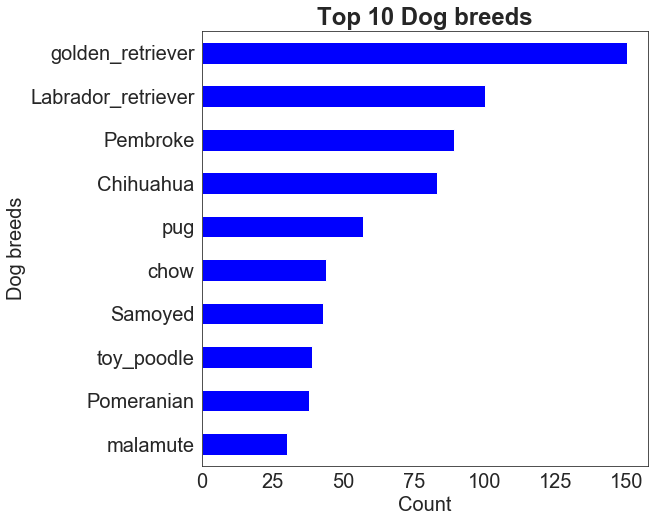

In [18]:
s.sort_values().plot(kind='barh', colormap='winter') # consistent color

font = {'size': 24,
        'weight': 'heavy'} 

plt.title('Top 10 Dog breeds', fontdict=font)
plt.ylabel('Dog breeds', fontsize='medium')
plt.xlabel('Count', fontsize='medium')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = 8,8;

* The most popular breed ranked in terms of tweets is the **Golden retriever** with **150** references.
* This was followed by **Labrador retriever**, **Pembroke** and **Chihuahua**, being clustered together with references amounting to **100**, **89** and **83** respectively.
* The rest of the dog breeds had 60 or less references, starting from **pug**, amounting to **57**.

*** 

> Retweet and favorite count over time - line plot (time series)

In [19]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 10 columns):
tweet_id              2086 non-null object
retweet_count         2086 non-null int64
favorite_count        2086 non-null int64
timestamp             2086 non-null datetime64[ns]
source                2086 non-null object
text                  2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
dog_stage             2086 non-null category
dtypes: category(1), datetime64[ns](1), int64(4), object(4)
memory usage: 149.0+ KB


In [20]:
# Earliest timestamp in dataset 

earliest = archive_master.timestamp.tail(1)
earliest

2085   2015-11-15 22:32:08
Name: timestamp, dtype: datetime64[ns]

In [21]:
# Latest timestamp in dataset

latest = archive_master.timestamp.head(1)
latest

0   2017-08-01 16:23:56
Name: timestamp, dtype: datetime64[ns]

Time of data runs between 2-3 years 

In [22]:
# Set index of the dataframe to datetime

archive_master.set_index('timestamp', inplace=True)

In [23]:
# Set the resample to year 

archive_master.resample('A')

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

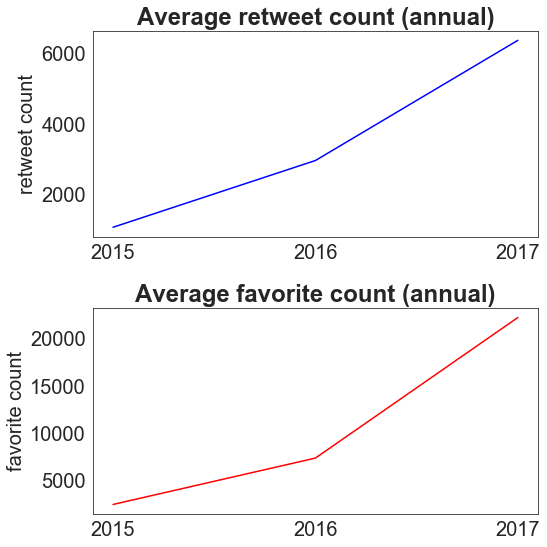

In [26]:
font = {'size': 24,
        'weight': 'heavy'} 

# first subplot 
plt.subplot(2,1,1)
average_retweet_count = archive_master['retweet_count'].\
resample(rule='A').mean()
plt.plot(['2015','2016','2017'], average_retweet_count, color='blue')
plt.ylabel('retweet count', fontsize='medium')
plt.title('Average retweet count (annual)', fontdict=font)

# Second subplot 
plt.subplot(2,1,2)
average_favorite_annual = archive_master['favorite_count'].\
resample(rule='A').mean()
plt.plot(['2015','2016','2017'], average_favorite_annual, color='red')

plt.ylabel('favorite count', fontsize='medium')
plt.title('Average favorite count (annual)', fontdict=font)

plt.tight_layout()
plt.show();

In [27]:
average_retweet_count, average_favorite_annual

(timestamp
 2015-12-31    1079.586466
 2016-12-31    2964.176357
 2017-12-31    6357.323907
 Freq: A-DEC, Name: retweet_count, dtype: float64, timestamp
 2015-12-31     2491.741353
 2016-12-31     7383.212209
 2017-12-31    22209.267352
 Freq: A-DEC, Name: favorite_count, dtype: float64)

In [28]:
# average_favorite_annual = archive_master['favorite_count'].\
# resample(rule='A').mean()
# average_favorite_annual.plot(kind='line')

During the period specified, **both** retweet and favorites count for the WeRateDogs twitter page increased on ***average*** per year
* favorite count - increased from around 1080 (2015) to 6357 (2017)
* retweet count - increased from around 2492 (2015) to 22209 (2017)

Given how both of these variables increase at a similar pace, this calls for seeing if there is a correlation between favorites and retweet counts for this twitter page...<br><br>

In [29]:
archive_master.head(1)

,tweet_id,retweet_count,favorite_count,source,text,rating_numerator,rating_denominator,name,dog_stage
timestamp,,,,,,,,,
2017-08-01 16:23:56,892420643555336193,8853,39467,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,10,10,Phineas,None


> Correlation between retweet and favorite count - scatter plot and correlation heatmap

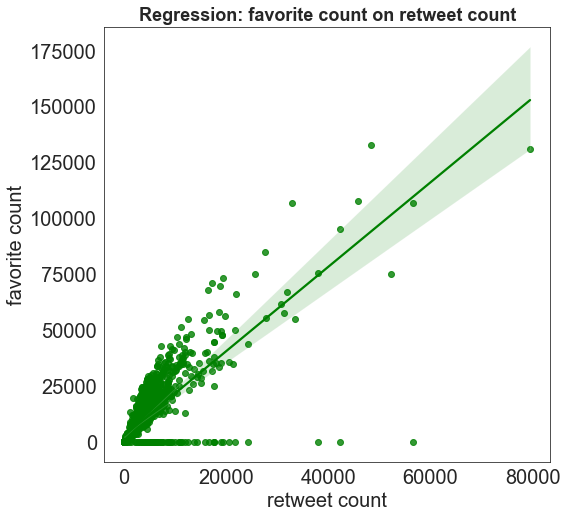

In [30]:
font = {'size': 18,
        'weight': 'heavy'} 

data= archive_master 
sns.regplot(x='retweet_count', y='favorite_count'
            , data=data, truncate=True, color='g')
plt.ylabel('favorite count', fontsize='medium')
plt.xlabel('retweet count', fontsize='medium')
plt.title('Regression: favorite count on retweet count', fontdict=font);

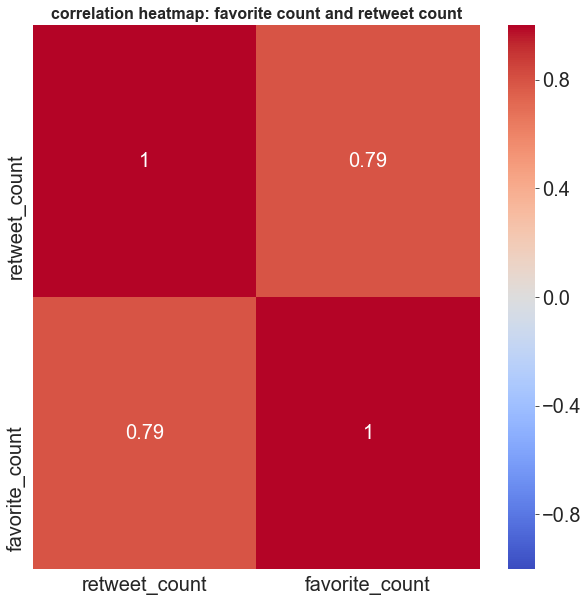

In [33]:
font = {'size': 16,
        'weight': 'heavy'} 

plt.figure(figsize=(10,10))
sns.heatmap(archive_master[['retweet_count', 
                            'favorite_count']].corr(),
           vmin=-1,
           cmap='coolwarm',
           annot=True)

plt.title('correlation heatmap: favorite count and retweet count',
          fontdict=font);

Looking at the graphic that illustrates a fitted linear regression (Scatter plot) model that estimates the relationship of favorite count on retweet count, we see many of the data points close to the estimated regression line, which illustrates a reasonably ***strong*** **positive correlation**.
<br><br>
This is reinforced by visualising the correlation heatmap, where the correlation coefficient between the above variables is **0.79** that supports this interpretation. Hence, it is reasonable to suggest that as the favorite count increases, the retweet count also increases.